Conteúdo da pasta de imagens:
['imagem0.png', 'imagem102.png', 'imagem103.png', 'imagem105.png', 'imagem107.png', 'imagem109.png', 'imagem118.png', 'imagem12.png', 'imagem123.png', 'imagem128.png', 'imagem131.png', 'imagem136.png', 'imagem140.png', 'imagem149.png', 'imagem153.png', 'imagem159.png', 'imagem162.png', 'imagem171.png', 'imagem175.png', 'imagem177.png', 'imagem18.png', 'imagem187.png', 'imagem19.png', 'imagem191.png', 'imagem200.png', 'imagem203.png', 'imagem204.png', 'imagem206.png', 'imagem21.png', 'imagem228.png', 'imagem229.png', 'imagem231.png', 'imagem235.png', 'imagem237.png', 'imagem238.png', 'imagem240.png', 'imagem245.png', 'imagem249.png', 'imagem25.png', 'imagem252.png', 'imagem263.png', 'imagem266.png', 'imagem268.png', 'imagem27.png', 'imagem36.png', 'imagem42.png', 'imagem47.png', 'imagem51.png', 'imagem53.png', 'imagem57.png', 'imagem66.png', 'imagem67.png', 'imagem69.png', 'imagem74.png', 'imagem80.png', 'imagem81.png', 'imagem84.png', 'imagem87.png', 'imag

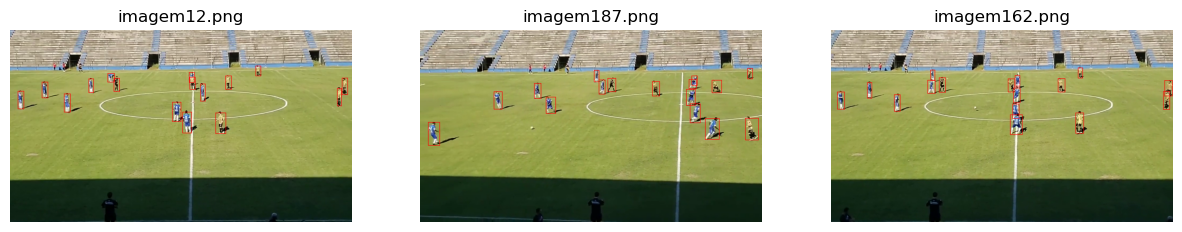

In [2]:
import os
import json
import random
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def carregar_jsons(pasta_json):
    """
    Carrega todos os arquivos JSON de uma pasta e retorna um dicionário
    com o nome do arquivo como chave e o conteúdo JSON como valor.
    """
    dados = {}
    for arquivo in os.listdir(pasta_json):
        if arquivo.endswith('.json'):
            caminho_arquivo = os.path.join(pasta_json, arquivo)
            with open(caminho_arquivo, 'r') as f:
                dados[arquivo] = json.load(f)
    return dados

def desenhar_deteccoes(imagem, deteccoes):
    """
    Desenha as detecções (caixas delimitadoras) na imagem usando as coordenadas do JSON.
    """
    draw = ImageDraw.Draw(imagem)
    for pessoa in deteccoes.get("2dPlayerTracking", {}).get("people", []):
        left, top, right, bottom = pessoa['left'], pessoa['top'], pessoa['right'], pessoa['bottom']
        draw.rectangle([(left, top), (right, bottom)], outline="red", width=2)
    return imagem

def exibir_imagens_aleatorias(pasta_imagens, dados_json, n=3):
    """
    Exibe N imagens aleatórias com detecções sobrepostas.
    """
    if not os.path.exists(pasta_imagens):
        raise FileNotFoundError(f"O diretório {pasta_imagens} não existe.")
    if not os.path.exists(pasta_json):
        raise FileNotFoundError(f"O diretório {pasta_json} não existe.")
    
    imagens_disponiveis = [img for img in os.listdir(pasta_imagens) if img.endswith('.jpg') or img.endswith('.png')]
    if len(imagens_disponiveis) == 0:
        raise ValueError("Nenhuma imagem .jpg ou .png encontrada no diretório de imagens.")

    imagens_selecionadas = random.sample(imagens_disponiveis, min(n, len(imagens_disponiveis)))

    plt.figure(figsize=(15, 5))
    for i, nome_imagem in enumerate(imagens_selecionadas):
        caminho_imagem = os.path.join(pasta_imagens, nome_imagem)
        imagem = Image.open(caminho_imagem)

        # Assume que o arquivo JSON correspondente possui o mesmo nome da imagem (sem a extensão da imagem)
        nome_json = os.path.splitext(nome_imagem)[0] + '.json'
        if nome_json in dados_json:
            deteccoes = dados_json[nome_json]
            imagem = desenhar_deteccoes(imagem, deteccoes)

        plt.subplot(1, n, i + 1)
        plt.imshow(imagem)
        plt.axis('off')
        plt.title(nome_imagem)

    plt.show()

# Defina o caminho para as pastas de imagens e JSONs
pasta_imagens = 'D:/Projeto/hackfot/toy/val/images'
pasta_json = 'D:/Projeto/hackfot/toy/val/labels'

# Verifica e exibe o conteúdo das pastas para garantir que tudo está configurado corretamente
if os.path.exists(pasta_imagens):
    print("Conteúdo da pasta de imagens:")
    print(os.listdir(pasta_imagens))
else:
    print(f"A pasta de imagens '{pasta_imagens}' não foi encontrada.")

if os.path.exists(pasta_json):
    print("\nConteúdo da pasta de JSONs:")
    print(os.listdir(pasta_json))
else:
    print(f"A pasta de JSONs '{pasta_json}' não foi encontrada.")

# Carrega os dados JSON
dados_json = carregar_jsons(pasta_json)

# Exibe 3 imagens aleatórias com as detecções sobrepostas
exibir_imagens_aleatorias(pasta_imagens, dados_json, n=3)

Cor média da grama em imagem0.png (BGR): (75.97045802936859, 144.3057256101711, 134.88025058254283)
Cor média da grama em imagem102.png (BGR): (74.47788367017378, 143.5825263114006, 134.07051278967396)
Cor média da grama em imagem103.png (BGR): (74.40156012591277, 143.62255499067194, 134.07604772376123)
Cor média da grama em imagem105.png (BGR): (74.2552077335483, 143.4080601512418, 133.81237124614537)
Cor média da grama em imagem107.png (BGR): (74.33400612717244, 143.46193886272764, 133.90575230729337)
Cor média da grama em imagem109.png (BGR): (74.44243449751949, 143.51002047477792, 133.96984652721193)
Cor média da grama em imagem118.png (BGR): (74.34158871571181, 143.24173438016027, 133.39807557001384)
Cor média da grama em imagem12.png (BGR): (75.60802145666408, 143.7979454535795, 134.2856563295388)
Cor média da grama em imagem123.png (BGR): (74.39986440677966, 143.42747916251244, 133.54032462612162)
Cor média da grama em imagem128.png (BGR): (74.78497353414663, 143.70677976669123,

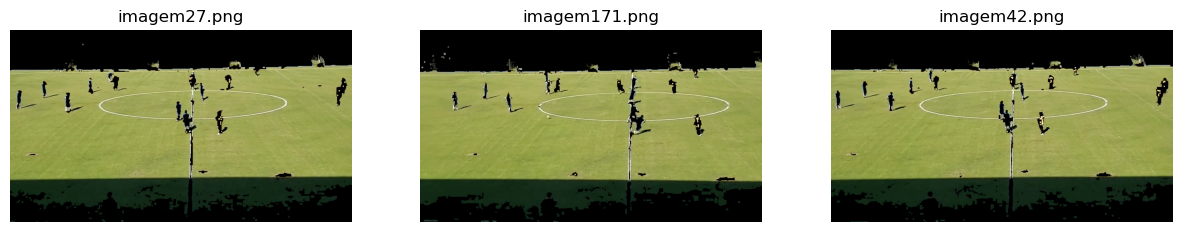

In [3]:
import os
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt

def carregar_imagem(caminho):
    """Carrega a imagem e converte para HSV."""
    img = cv2.imread(caminho)
    if img is None:
        raise FileNotFoundError(f"Erro ao carregar a imagem: {caminho}")
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    return img, hsv

def aplicar_mascara_verde(hsv, lower_green=(30, 40, 40), upper_green=(80, 255, 255)):
    """Aplica uma máscara para isolar a área verde na imagem HSV."""
    mask = cv2.inRange(hsv, np.array(lower_green), np.array(upper_green))
    mask = cv2.GaussianBlur(mask, (5, 5), 0)  # Suavizar a máscara para reduzir ruídos
    return mask

def exibir_imagem(img, titulo="Imagem"):
    """Exibe a imagem usando matplotlib."""
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(titulo)
    plt.axis("off")
    plt.show()

def calcular_cor_media(img, mask):
    """Calcula a cor média na área verde da imagem."""
    media_cor = cv2.mean(img, mask=mask)[:3]  # Apenas valores BGR
    return media_cor

def processar_imagens(pasta_imagens, pasta_saida, n_exibir=3):
    """Processa todas as imagens na pasta, aplica a máscara verde e salva as imagens."""
    if not os.path.exists(pasta_saida):
        os.makedirs(pasta_saida)

    imagens_disponiveis = [img for img in os.listdir(pasta_imagens) if img.endswith('.jpg') or img.endswith('.png')]
    imagens_selecionadas = random.sample(imagens_disponiveis, min(n_exibir, len(imagens_disponiveis)))
    
    for nome_imagem in imagens_disponiveis:
        caminho_imagem = os.path.join(pasta_imagens, nome_imagem)
        img, hsv = carregar_imagem(caminho_imagem)

        # Aplicar a máscara para a cor verde
        mask = aplicar_mascara_verde(hsv)
        
        # Aplicar a máscara à imagem original para exibir apenas a área verde
        masked_img = cv2.bitwise_and(img, img, mask=mask)

        # Salvar a imagem com a máscara aplicada
        caminho_saida = os.path.join(pasta_saida, nome_imagem)
        cv2.imwrite(caminho_saida, masked_img)
        
        # Calcular a cor média da área verde (opcional)
        grass_color = calcular_cor_media(img, mask)
        print(f"Cor média da grama em {nome_imagem} (BGR):", grass_color)
    
    # Exibir 3 imagens aleatórias com a máscara verde aplicada
    plt.figure(figsize=(15, 5))
    for i, nome_imagem in enumerate(imagens_selecionadas):
        caminho_saida = os.path.join(pasta_saida, nome_imagem)
        img = cv2.imread(caminho_saida)
        
        plt.subplot(1, n_exibir, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title(nome_imagem)
    
    plt.show()

# Caminhos de entrada e saída
pasta_imagens = 'D:/Projeto/hackfot/toy/val/images'
pasta_saida = 'D:/Projeto/hackfot/pqpdeubom'

# Processar as imagens e exibir três imagens aleatórias
processar_imagens(pasta_imagens, pasta_saida, n_exibir=3)

Cor média do jogador em imagem0.png (BGR): (106.4350003112799, 120.4648298188351, 116.79302555163244)
Cor média do jogador em imagem102.png (BGR): (104.05701926622281, 118.33381796162344, 114.25130025270617)
Cor média do jogador em imagem103.png (BGR): (103.85470898581693, 118.12144147604843, 113.97498304392974)
Cor média do jogador em imagem105.png (BGR): (104.00655860019013, 118.33106189152436, 114.19418270214327)
Cor média do jogador em imagem107.png (BGR): (104.12424931017692, 118.42238513468834, 114.34901140387264)
Cor média do jogador em imagem109.png (BGR): (104.19275538933479, 118.48533128425551, 114.44806368149646)
Cor média do jogador em imagem118.png (BGR): (104.3354849801978, 118.5191974156107, 114.37761704104317)
Cor média do jogador em imagem12.png (BGR): (106.11275501237641, 120.08605708941109, 116.22927507826485)
Cor média do jogador em imagem123.png (BGR): (103.99742394763435, 118.15136871634768, 113.86638311991916)
Cor média do jogador em imagem128.png (BGR): (104.871

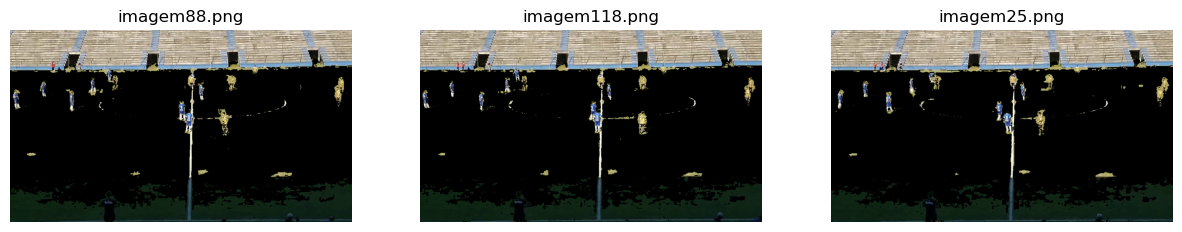

In [4]:
import os
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt

def carregar_imagem(caminho):
    """Carrega a imagem e converte para HSV."""
    img = cv2.imread(caminho)
    if img is None:
        raise FileNotFoundError(f"Erro ao carregar a imagem: {caminho}")
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    return img, hsv

def aplicar_mascara_jogadores(hsv, lower_green=(30, 40, 40), upper_green=(80, 255, 255)):
    """Aplica uma máscara para isolar as áreas não-verdes (jogadores) na imagem HSV."""
    # Criar a máscara para a área verde (grama)
    mask = cv2.inRange(hsv, np.array(lower_green), np.array(upper_green))
    # Inverter a máscara para que apenas os jogadores fiquem visíveis
    mask_invertida = cv2.bitwise_not(mask)
    return mask_invertida

def exibir_imagem(img, titulo="Imagem"):
    """Exibe a imagem usando matplotlib."""
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(titulo)
    plt.axis("off")
    plt.show()

def calcular_cor_media(img, mask):
    """Calcula a cor média na área selecionada da imagem."""
    media_cor = cv2.mean(img, mask=mask)[:3]  # Apenas valores BGR
    return media_cor

def processar_imagens_jogadores(pasta_imagens, pasta_saida, n_exibir=3):
    """Processa todas as imagens na pasta, aplica a máscara para isolar os jogadores e salva as imagens."""
    if not os.path.exists(pasta_saida):
        os.makedirs(pasta_saida)

    imagens_disponiveis = [img for img in os.listdir(pasta_imagens) if img.endswith('.jpg') or img.endswith('.png')]
    imagens_selecionadas = random.sample(imagens_disponiveis, min(n_exibir, len(imagens_disponiveis)))
    
    for nome_imagem in imagens_disponiveis:
        caminho_imagem = os.path.join(pasta_imagens, nome_imagem)
        img, hsv = carregar_imagem(caminho_imagem)

        # Aplicar a máscara para isolar os jogadores
        mask = aplicar_mascara_jogadores(hsv)
        
        # Aplicar a máscara invertida à imagem original para manter apenas os jogadores e o fundo preto
        jogadores_img = cv2.bitwise_and(img, img, mask=mask)

        # Salvar a imagem com os jogadores isolados
        caminho_saida = os.path.join(pasta_saida, nome_imagem)
        cv2.imwrite(caminho_saida, jogadores_img)
        
        # Calcular a cor média dos jogadores (opcional)
        player_color = calcular_cor_media(img, mask)
        print(f"Cor média do jogador em {nome_imagem} (BGR):", player_color)
    
    # Exibir 3 imagens aleatórias com apenas os jogadores e fundo preto
    plt.figure(figsize=(15, 5))
    for i, nome_imagem in enumerate(imagens_selecionadas):
        caminho_saida = os.path.join(pasta_saida, nome_imagem)
        img = cv2.imread(caminho_saida)
        
        plt.subplot(1, n_exibir, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title(nome_imagem)
    
    plt.show()

# Caminhos de entrada e saída
pasta_imagens = 'D:/Projeto/hackfot/toy/val/images'
pasta_saida = 'D:/Projeto/hackfot/pqpdeubom'

# Processar as imagens e exibir três imagens aleatórias com jogadores isolados
processar_imagens_jogadores(pasta_imagens, pasta_saida, n_exibir=3)

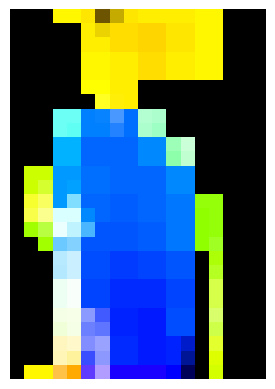

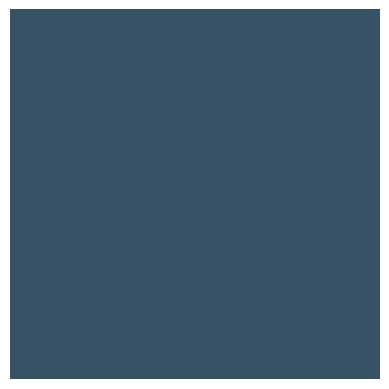

Player Kit Color:  [101.8196347   81.94977169  55.06392694]
####################################################################################################


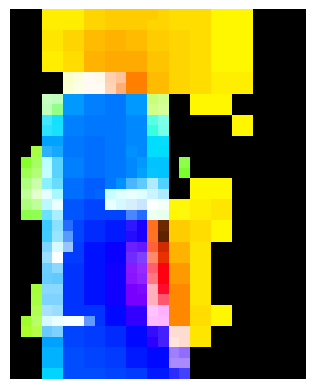

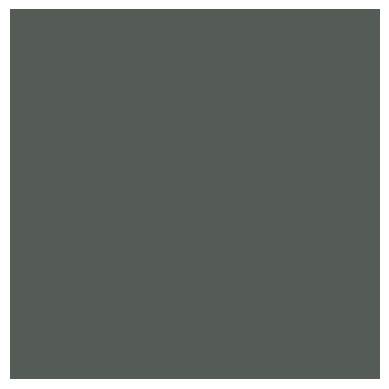

Player Kit Color:  [85.97674419 92.83615222 84.20824524]
####################################################################################################


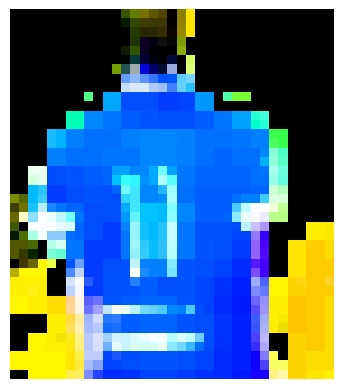

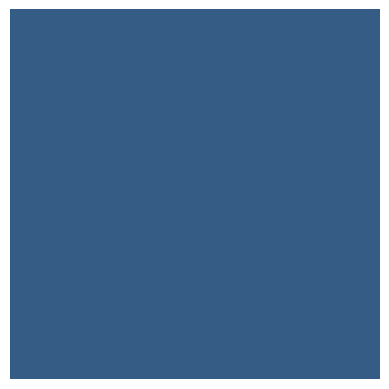

Player Kit Color:  [133.71111111  92.64962963  53.11037037]
####################################################################################################


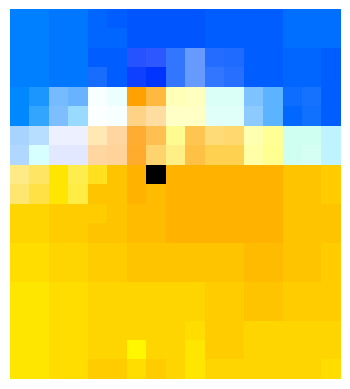

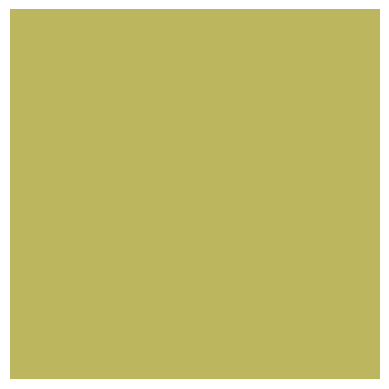

Player Kit Color:  [ 95.96238245 183.42946708 188.55172414]
####################################################################################################


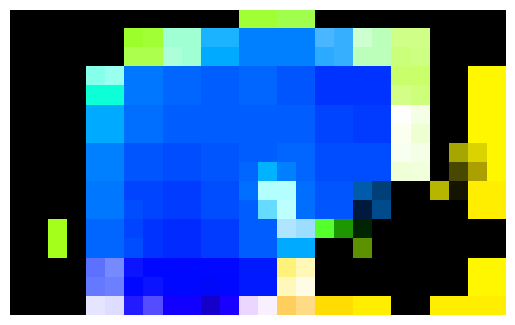

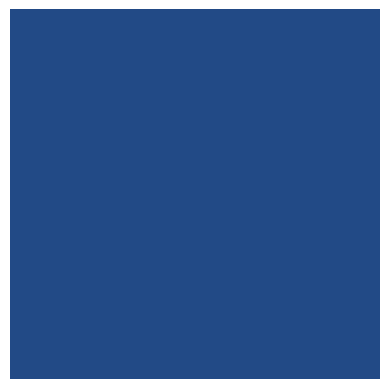

Player Kit Color:  [134.49081365  74.17322835  34.91076115]
####################################################################################################


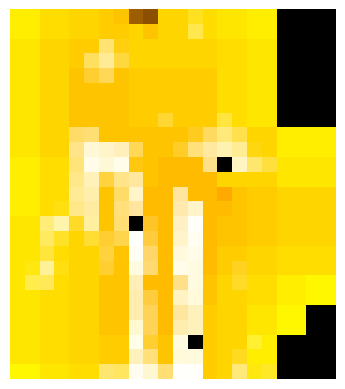

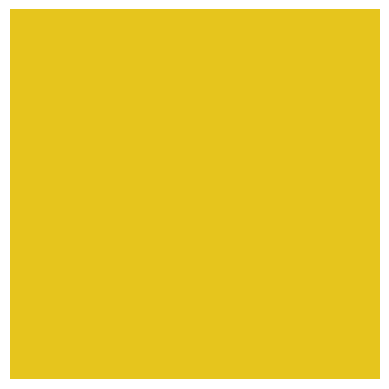

Player Kit Color:  [ 29.42363636 197.86181818 230.96545455]
####################################################################################################


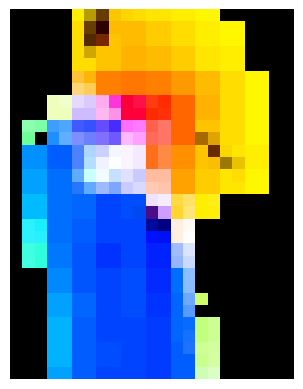

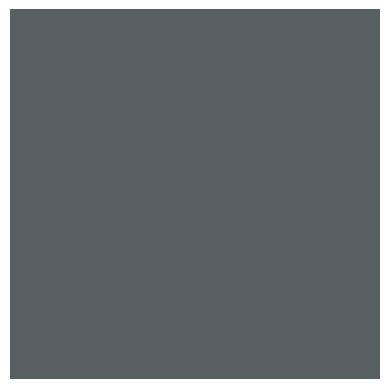

Player Kit Color:  [97.06287425 95.98502994 88.57634731]
####################################################################################################


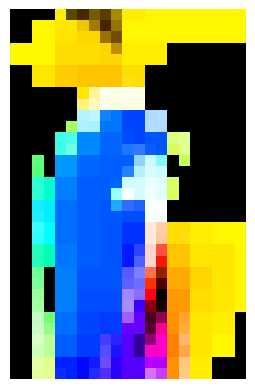

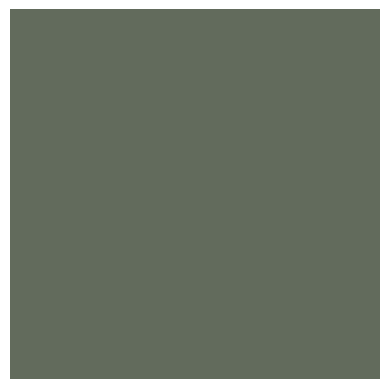

Player Kit Color:  [ 92.71320182 107.13353566  98.01517451]
####################################################################################################


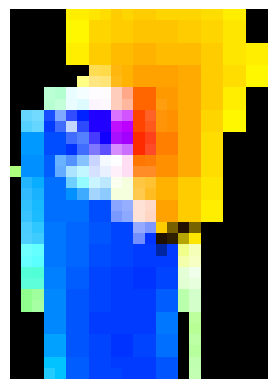

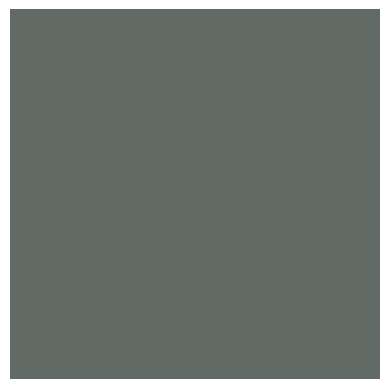

Player Kit Color:  [101.97547684 106.17574932  97.46866485]
####################################################################################################


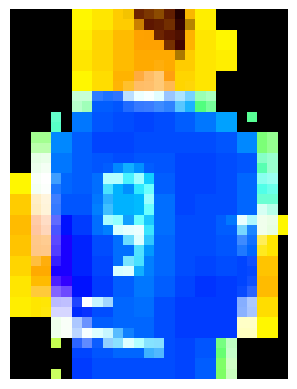

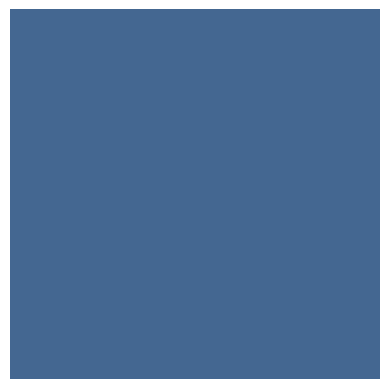

Player Kit Color:  [145.7315508  103.1828877   68.55508021]
####################################################################################################


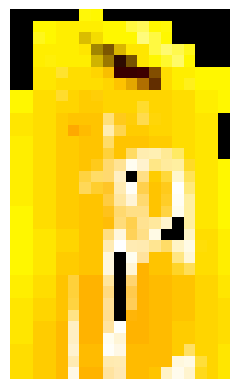

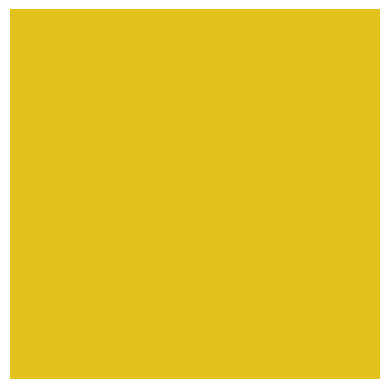

Player Kit Color:  [ 29.34375    194.91940789 227.31743421]
####################################################################################################


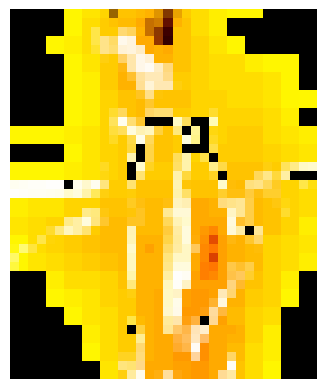

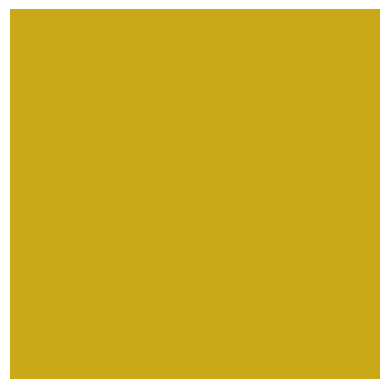

Player Kit Color:  [ 25.50932568 169.11406026 202.12482066]
####################################################################################################


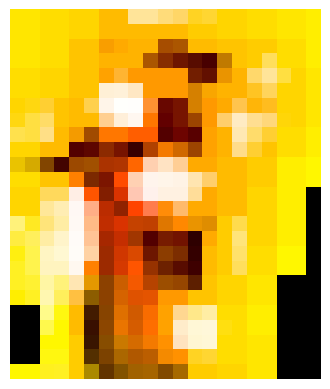

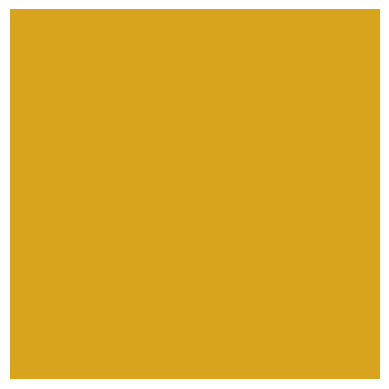

Player Kit Color:  [ 30.2552381  164.24380952 216.69333333]
####################################################################################################


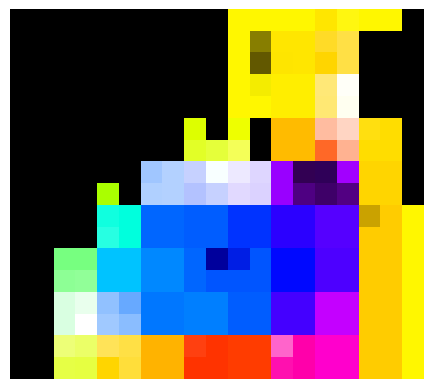

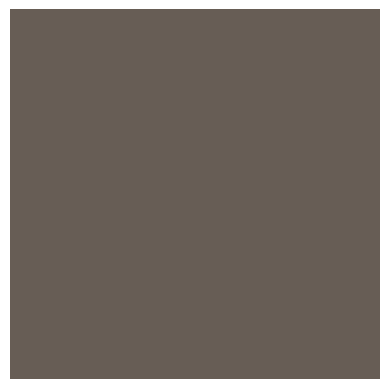

Player Kit Color:  [ 85.48113208  93.81446541 103.25157233]
####################################################################################################


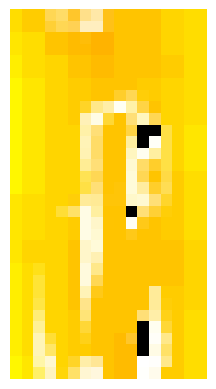

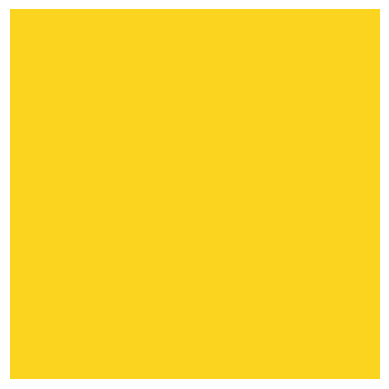

Player Kit Color:  [ 31.71323529 212.38419118 251.71875   ]
####################################################################################################


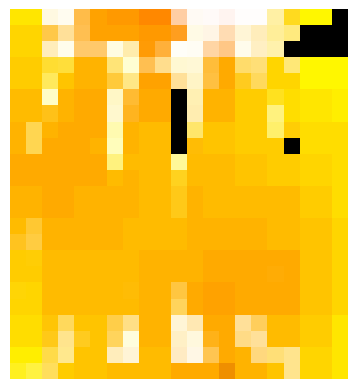

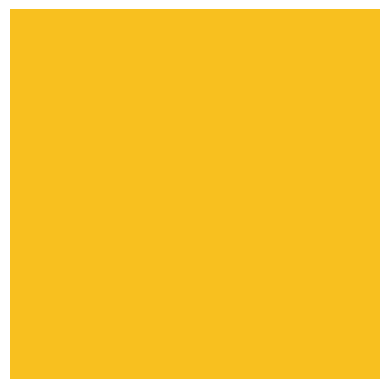

Player Kit Color:  [ 31.57763975 192.83229814 248.10351967]
####################################################################################################


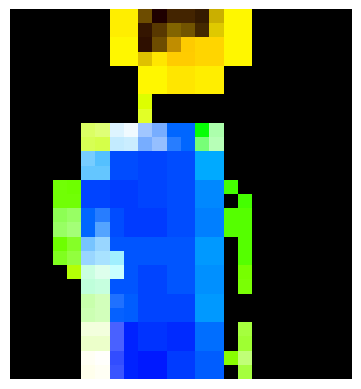

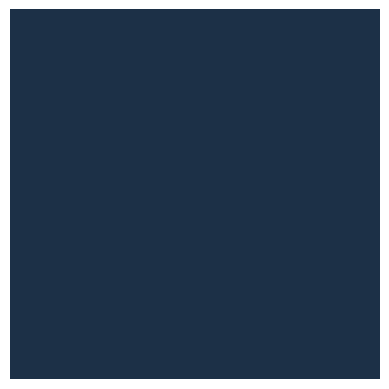

Player Kit Color:  [71.62867012 48.11917098 28.22107081]
####################################################################################################


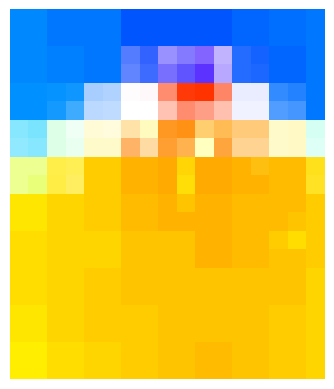

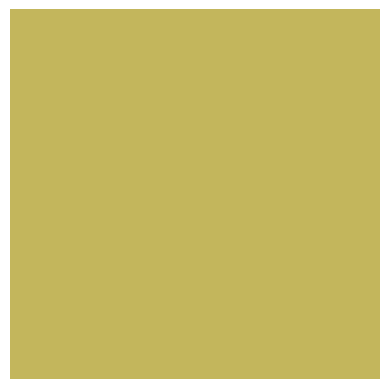

Player Kit Color:  [ 92.05970149 182.75223881 195.12238806]
####################################################################################################


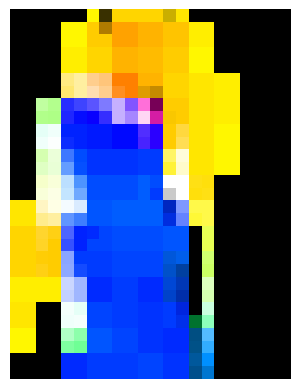

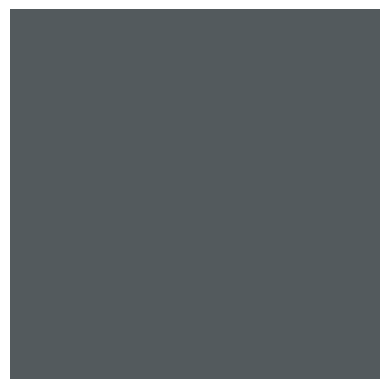

Player Kit Color:  [93.21970921 90.81583199 83.69789984]
####################################################################################################


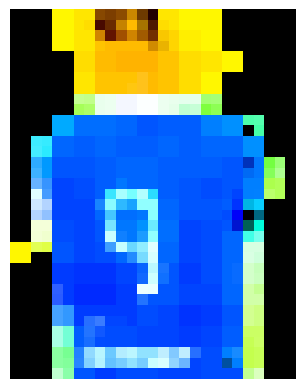

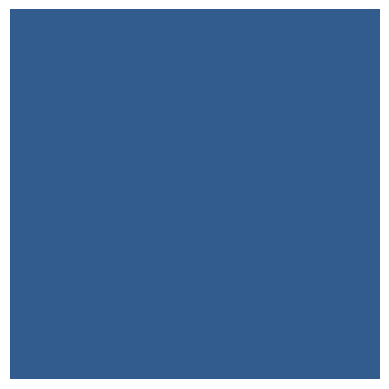

Player Kit Color:  [141.9819209   92.09830508  50.79435028]
####################################################################################################


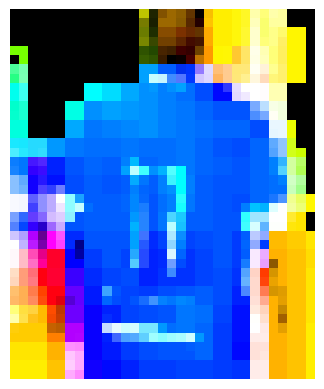

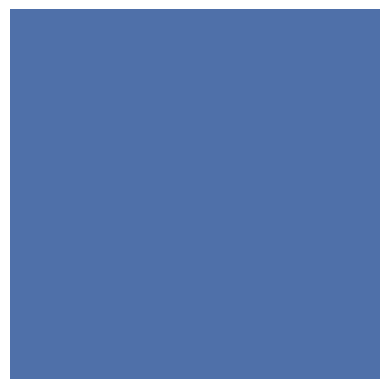

Player Kit Color:  [169.91640867 112.85294118  79.31965944]
####################################################################################################


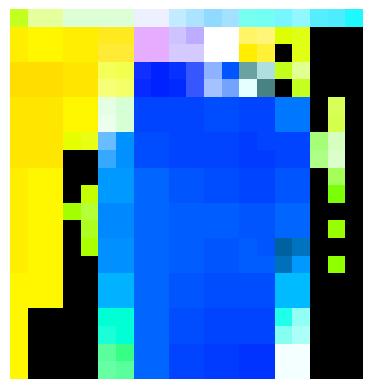

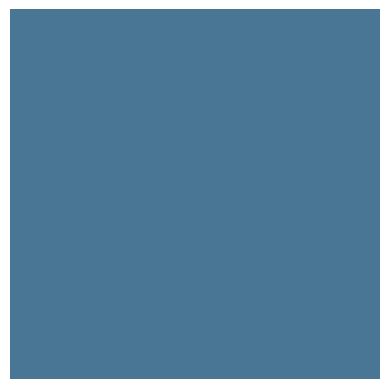

Player Kit Color:  [148.45714286 118.13246753  73.48831169]
####################################################################################################


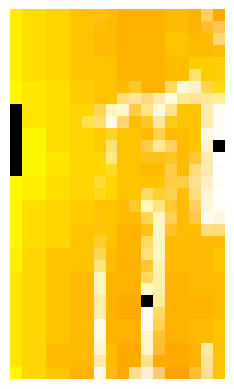

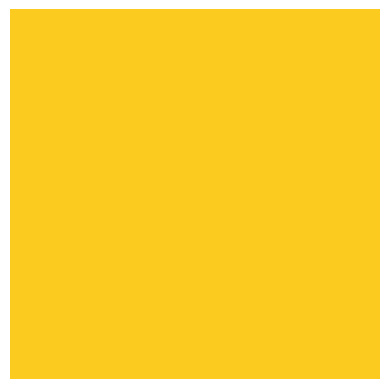

Player Kit Color:  [ 31.70609319 203.20071685 251.34408602]
####################################################################################################


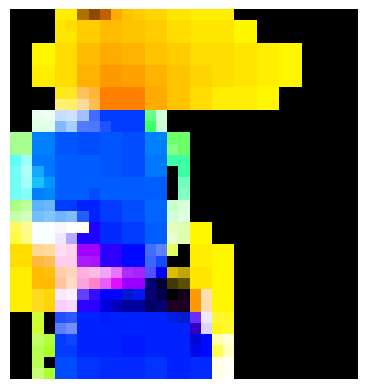

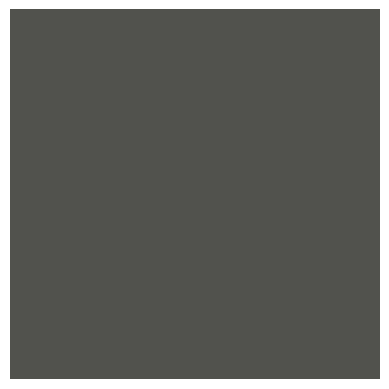

Player Kit Color:  [77.64604462 82.7525355  81.35294118]
####################################################################################################


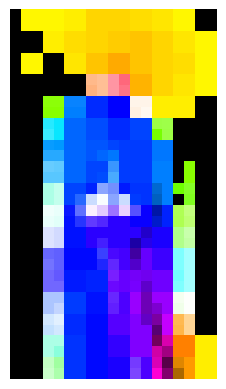

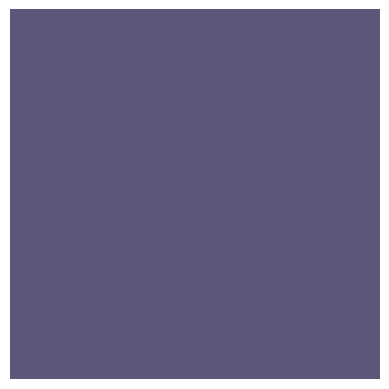

Player Kit Color:  [123.84991843  86.96574225  92.3050571 ]
####################################################################################################


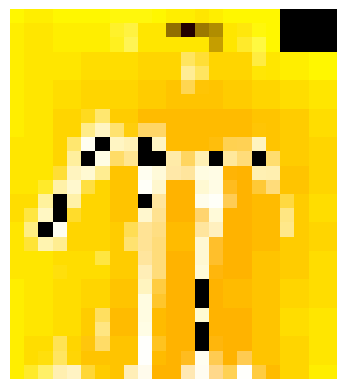

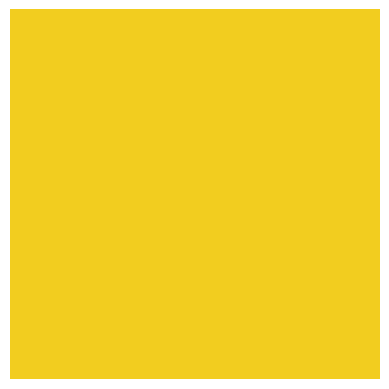

Player Kit Color:  [ 31.00501672 205.43143813 242.54180602]
####################################################################################################


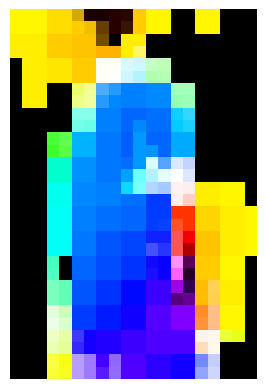

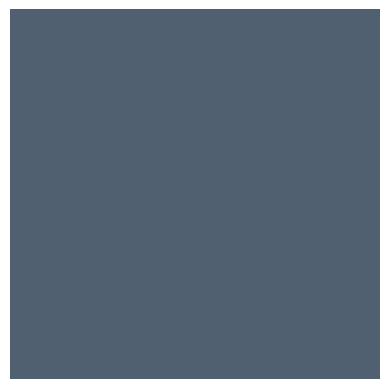

Player Kit Color:  [112.83274648  96.29753521  80.46478873]
####################################################################################################


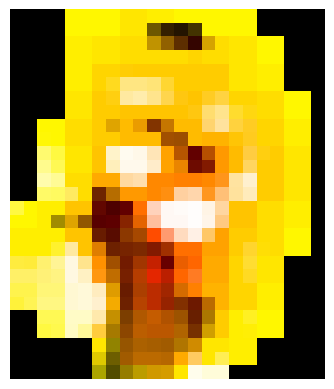

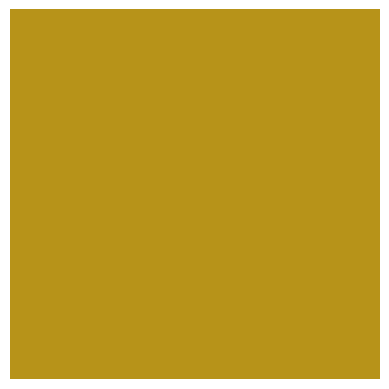

Player Kit Color:  [ 25.57004831 147.93236715 183.26409018]
####################################################################################################


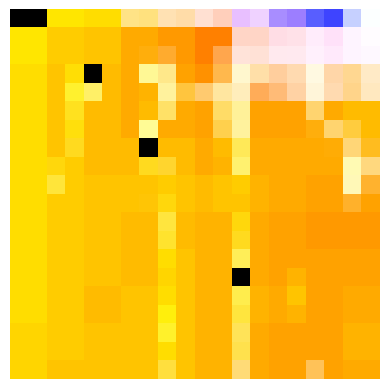

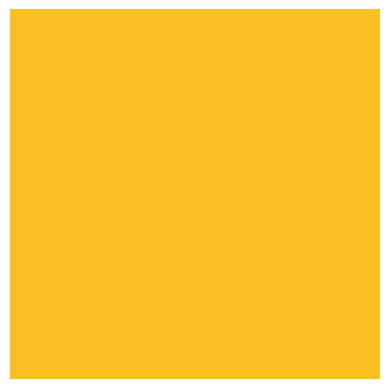

Player Kit Color:  [ 34.43   191.7025 250.1925]
####################################################################################################


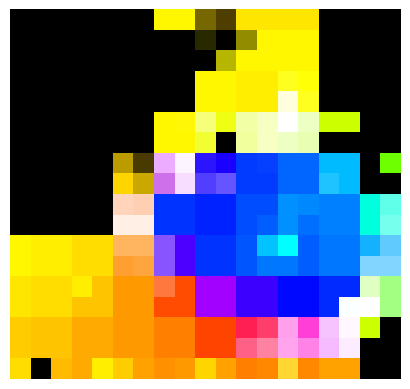

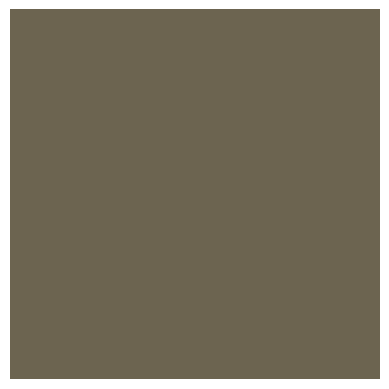

Player Kit Color:  [ 80.31024096 100.80120482 108.99096386]
####################################################################################################


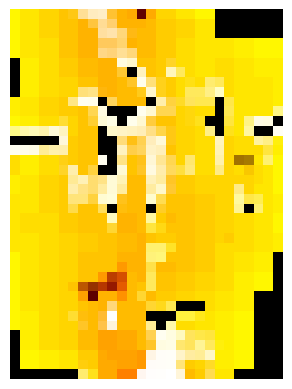

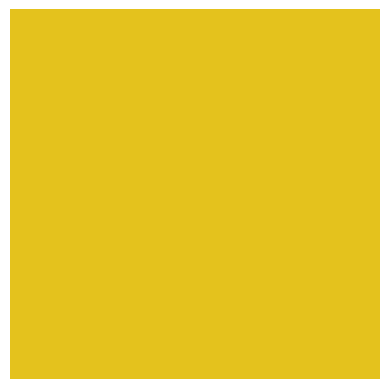

Player Kit Color:  [ 29.1343985  194.15601504 228.42011278]
####################################################################################################


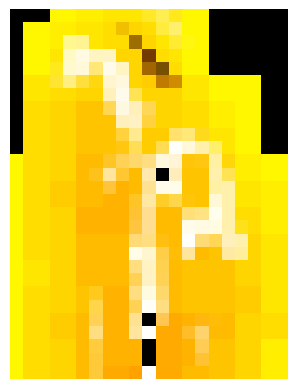

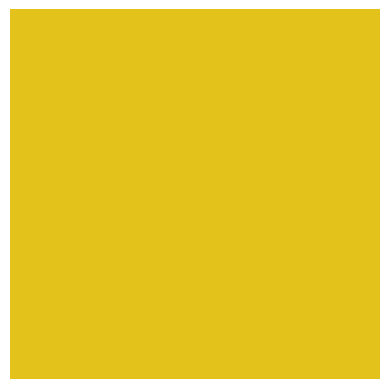

Player Kit Color:  [ 28.9914966  194.05102041 228.39965986]
####################################################################################################


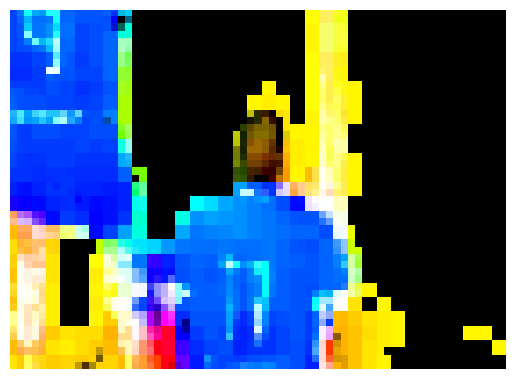

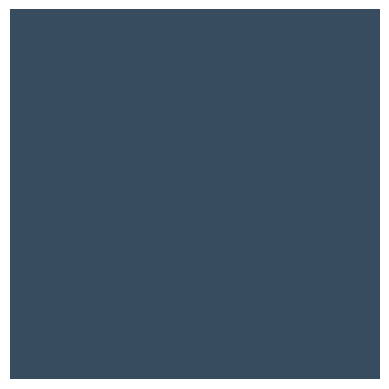

Player Kit Color:  [96.76125592 76.64514218 56.09626777]
####################################################################################################


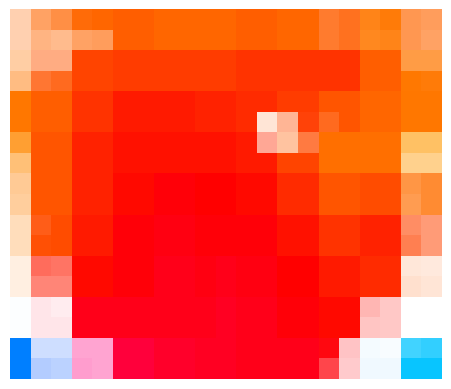

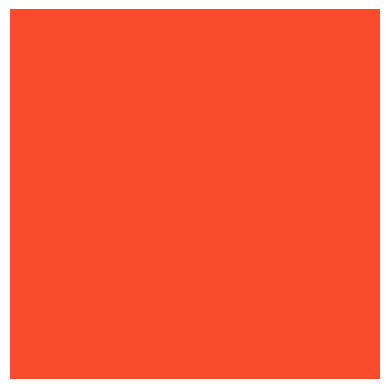

Player Kit Color:  [ 44.48412698  76.67195767 250.51587302]
####################################################################################################


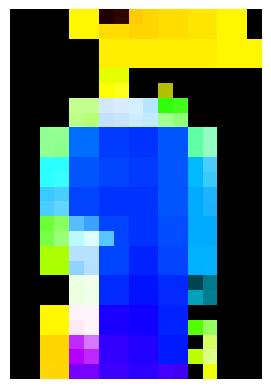

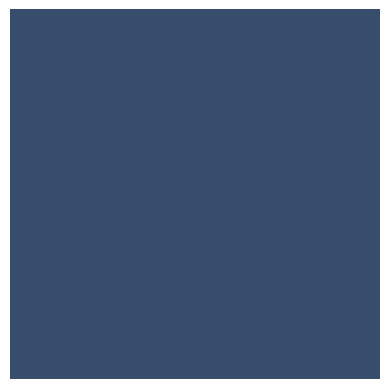

Player Kit Color:  [109.32070707  77.63131313  57.27777778]
####################################################################################################


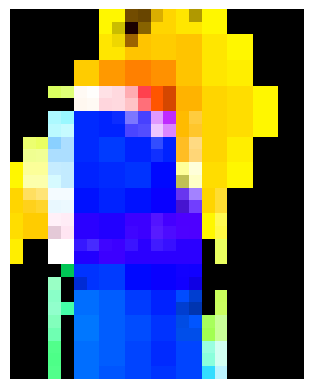

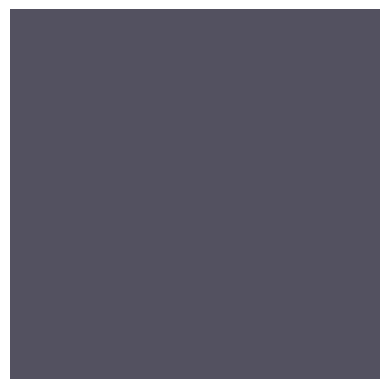

Player Kit Color:  [96.25426357 81.25271318 83.16124031]
####################################################################################################


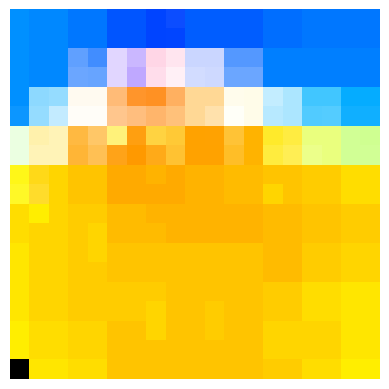

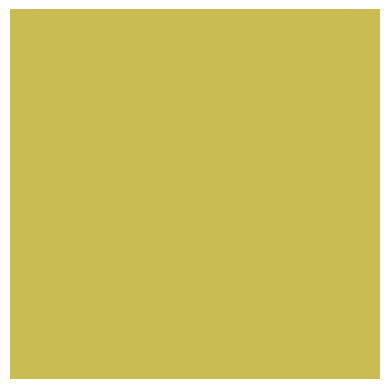

Player Kit Color:  [ 83.69405099 188.46175637 200.8611898 ]
####################################################################################################


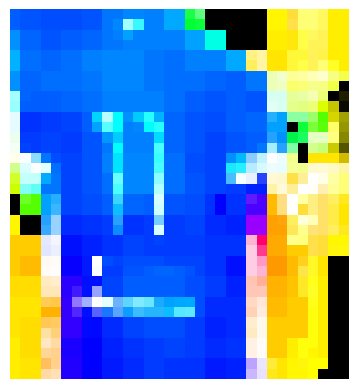

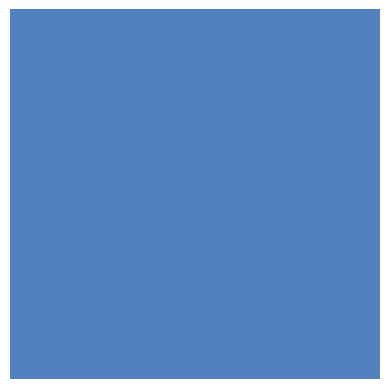

Player Kit Color:  [190.93928881 129.02775369  81.66522116]
####################################################################################################


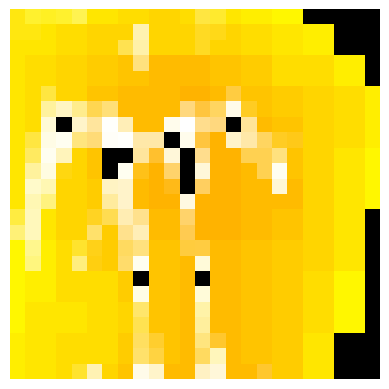

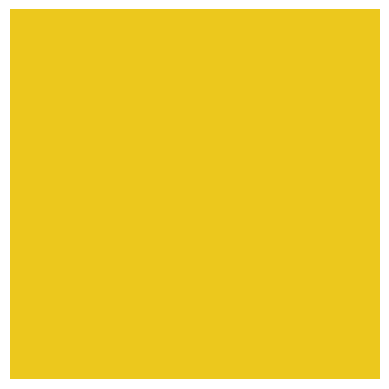

Player Kit Color:  [ 29.99131944 200.34201389 236.84895833]
####################################################################################################


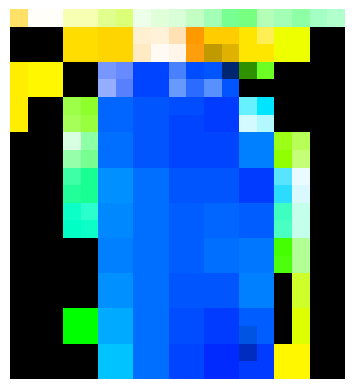

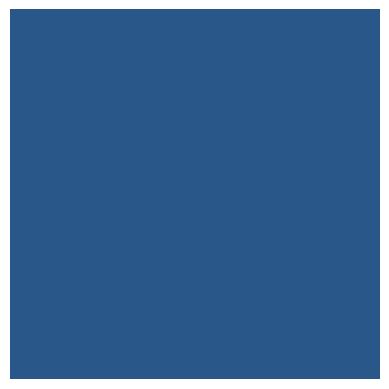

Player Kit Color:  [138.50708215  87.7733711   41.        ]
####################################################################################################


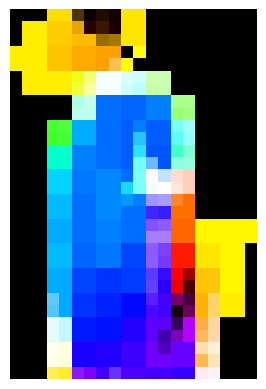

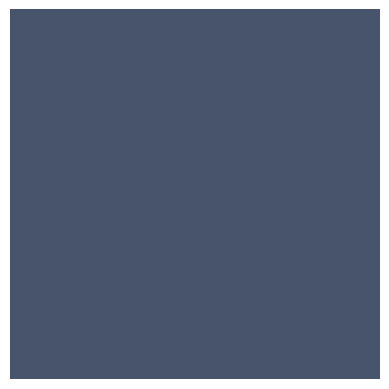

Player Kit Color:  [108.82465278  83.68229167  72.18055556]
####################################################################################################


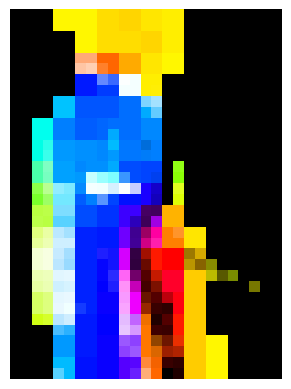

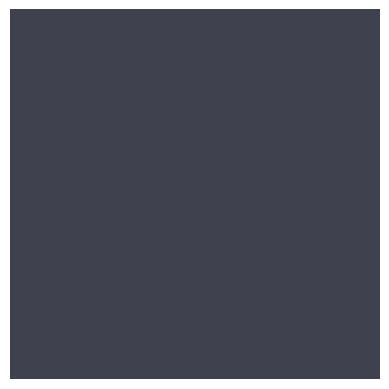

Player Kit Color:  [78.80609756 65.60365854 64.27073171]
####################################################################################################


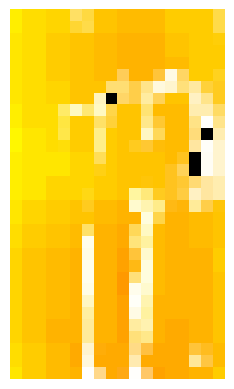

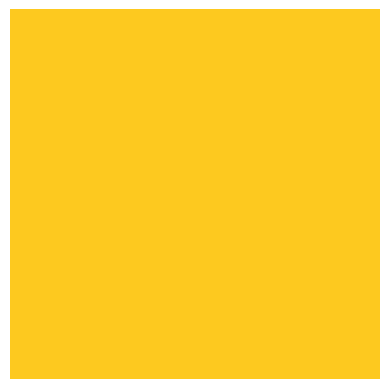

Player Kit Color:  [ 31.95878136 201.90501792 253.17204301]
####################################################################################################


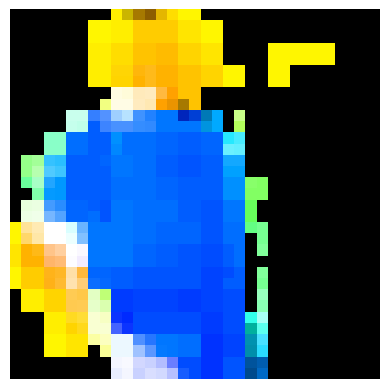

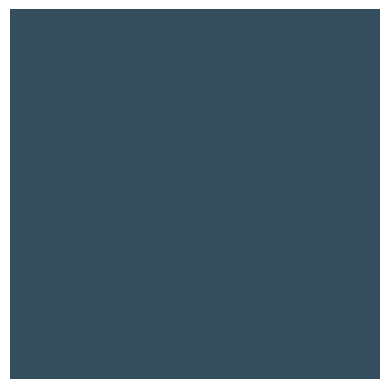

Player Kit Color:  [94.26280835 78.51043643 52.92220114]
####################################################################################################


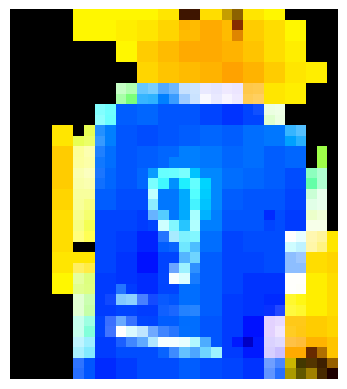

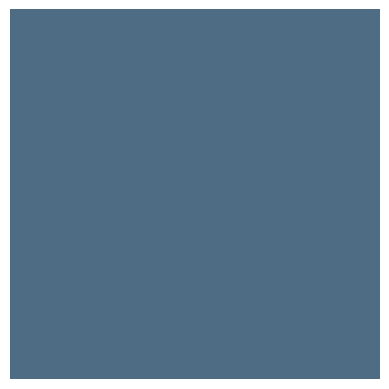

Player Kit Color:  [132.1245283  108.69811321  78.63962264]
####################################################################################################


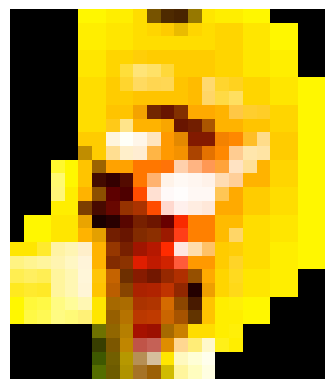

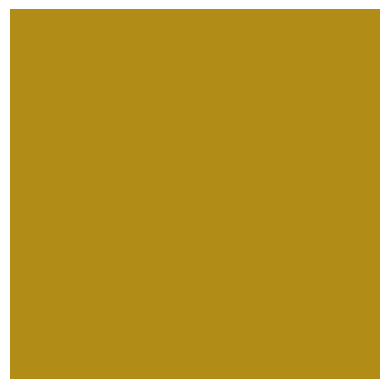

Player Kit Color:  [ 24.87075929 141.36833603 177.52180937]
####################################################################################################


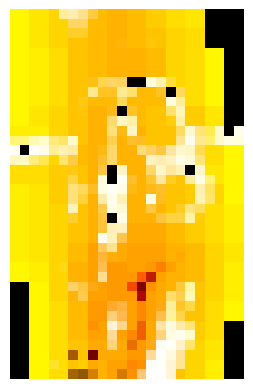

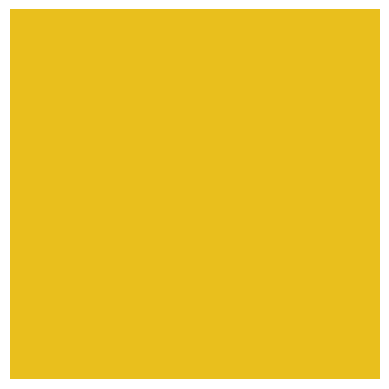

Player Kit Color:  [ 29.80482456 191.68092105 233.37828947]
####################################################################################################


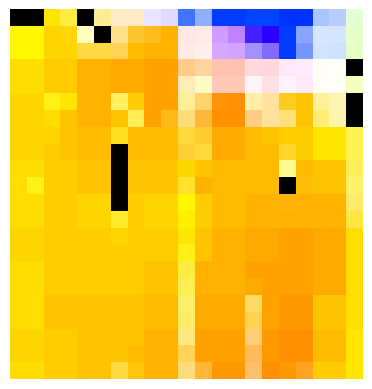

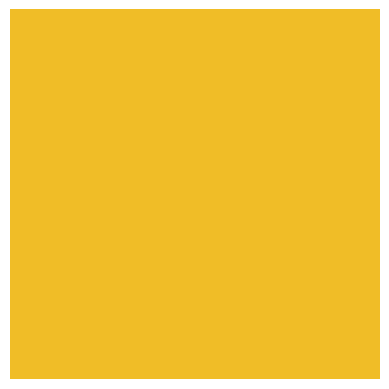

Player Kit Color:  [ 39.62445415 189.91266376 240.0371179 ]
####################################################################################################


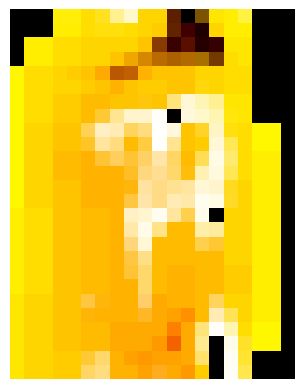

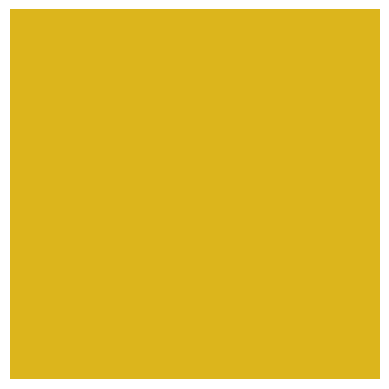

Player Kit Color:  [ 28.63269231 181.33653846 220.89423077]
####################################################################################################


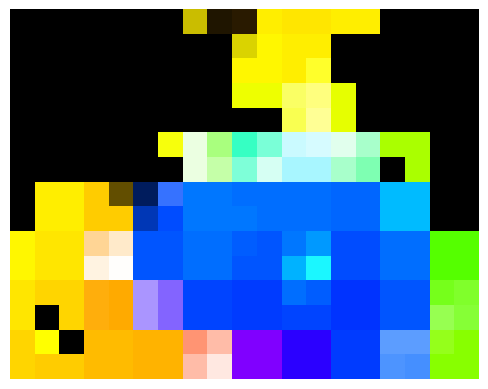

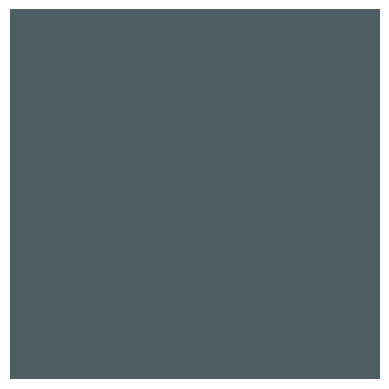

Player Kit Color:  [99.42911877 94.14942529 76.44061303]
####################################################################################################
Cores salvas em D:/Projeto/hackfot/pqpdeubom/cores_jogadores/cores-jogadores.json


In [14]:
import os
import json
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

def carregar_jsons(pasta_json):
    """
    Carrega todos os arquivos JSON de uma pasta e retorna um dicionário
    com o nome do arquivo como chave e o conteúdo JSON como valor.
    """
    dados = {}
    for arquivo in os.listdir(pasta_json):
        if arquivo.endswith('.json'):
            caminho_arquivo = os.path.join(pasta_json, arquivo)
            with open(caminho_arquivo, 'r') as f:
                dados[arquivo] = json.load(f)
    return dados

def calcular_cor_media(img, mask):
    """Calcula a cor média na área selecionada da imagem."""
    media_cor = np.array(cv2.mean(img, mask=mask)[:3])
    return media_cor

def exibir_resultados(img, player_kit_color):
    """
    Exibe a cor média do uniforme do jogador e o corte da imagem correspondente.
    """
    # Exibir a imagem do jogador
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

    # Exibir a cor média do uniforme
    demo_color = np.ones((50, 50, 3), dtype=np.uint8) * player_kit_color.astype(np.uint8)
    plt.imshow(cv2.cvtColor(demo_color, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

    print("Player Kit Color: ", player_kit_color)
    print('#' * 100)

def processar_parte_superior(player_img):
    """Corta a imagem para manter apenas a parte superior e realça as cores com ajustes."""
    altura = player_img.shape[0]
    parte_superior = player_img[:altura // 2, :]

    # Converter para HSV
    hsv = cv2.cvtColor(parte_superior, cv2.COLOR_BGR2HSV)

    # Aumentar a saturação dinamicamente e aplicar equalização no canal de saturação
    hsv[..., 1] = cv2.equalizeHist(hsv[..., 1])  # Equaliza o canal de saturação
    hsv[..., 1] = np.clip(hsv[..., 1] * 3.8, 0, 255)  # Aumenta a saturação com fator dinâmico

    # Aumentar o brilho no canal V para tornar as cores mais vivas
    hsv[..., 2] = np.clip(hsv[..., 2] * 5.2, 0, 255)

    # Converter de volta para BGR após os ajustes
    img_realcada = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    return img_realcada

# Caminhos das pastas
pasta_imagens = 'D:/Projeto/hackfot/pqpdeubom'
pasta_json = 'D:/Projeto/hackfot/toy/val/labels'

# Carrega os dados JSON
dados_json = carregar_jsons(pasta_json)

# Dicionário para armazenar as cores médias de cada jogador
cores_jogadores = {}

# Seleciona todas as imagens disponíveis para processar
imagens_disponiveis = [img for img in os.listdir(pasta_imagens) if img.endswith('.jpg') or img.endswith('.png')]

# Processa todas as imagens da pasta
for nome_imagem in imagens_disponiveis:
    caminho_imagem = os.path.join(pasta_imagens, nome_imagem)
    img = cv2.imread(caminho_imagem)

    nome_json = os.path.splitext(nome_imagem)[0] + '.json'
    if nome_json in dados_json:
        deteccoes = dados_json[nome_json]
        
        cores_jogadores[nome_imagem] = []  # Inicializa uma lista para essa imagem

        for pessoa in deteccoes.get("2dPlayerTracking", {}).get("people", []):
            x1, y1, x2, y2 = int(pessoa['left']), int(pessoa['top']), int(pessoa['right']), int(pessoa['bottom'])
            player_img = img[y1: y2, x1: x2]

            # Processar apenas a parte superior com ajustes para realce de cores
            camisa_img = processar_parte_superior(player_img)

            # Converter para HSV e aplicar uma máscara para excluir áreas de fundo
            hsv = cv2.cvtColor(camisa_img, cv2.COLOR_BGR2HSV)
            lower_green = np.array([35, 40, 40])  # Faixa inferior do verde para grama
            upper_green = np.array([85, 255, 255])  # Faixa superior do verde para grama
            mask = cv2.inRange(hsv, lower_green, upper_green)
            mask = cv2.bitwise_not(mask)  # Inverte a máscara para manter as cores da camisa apenas

            # Calcular a cor média da camisa
            player_kit_color = calcular_cor_media(camisa_img, mask)

            # Salva a cor média no dicionário
            cores_jogadores[nome_imagem].append(player_kit_color.tolist())

# Seleciona três imagens aleatórias para exibir os resultados
imagens_para_exibir = random.sample(imagens_disponiveis, min(3, len(imagens_disponiveis)))

for nome_imagem in imagens_para_exibir:
    caminho_imagem = os.path.join(pasta_imagens, nome_imagem)
    img = cv2.imread(caminho_imagem)

    nome_json = os.path.splitext(nome_imagem)[0] + '.json'
    if nome_json in dados_json:
        deteccoes = dados_json[nome_json]

        for pessoa in deteccoes.get("2dPlayerTracking", {}).get("people", []):
            x1, y1, x2, y2 = int(pessoa['left']), int(pessoa['top']), int(pessoa['right']), int(pessoa['bottom'])
            player_img = img[y1: y2, x1: x2]

            camisa_img = processar_parte_superior(player_img)

            hsv = cv2.cvtColor(camisa_img, cv2.COLOR_BGR2HSV)
            lower_green = np.array([35, 40, 40])
            upper_green = np.array([85, 255, 255])
            mask = cv2.inRange(hsv, lower_green, upper_green)
            mask = cv2.bitwise_not(mask)

            player_kit_color = calcular_cor_media(camisa_img, mask)

            # Exibir os resultados para análise
            exibir_resultados(camisa_img, player_kit_color)

# Salvar as cores em um arquivo JSON
caminho_cores_json = 'D:/Projeto/hackfot/pqpdeubom/cores_jogadores/cores-jogadores.json'
with open(caminho_cores_json, 'w') as f:
    json.dump(cores_jogadores, f, indent=4)

print(f"Cores salvas em {caminho_cores_json}")


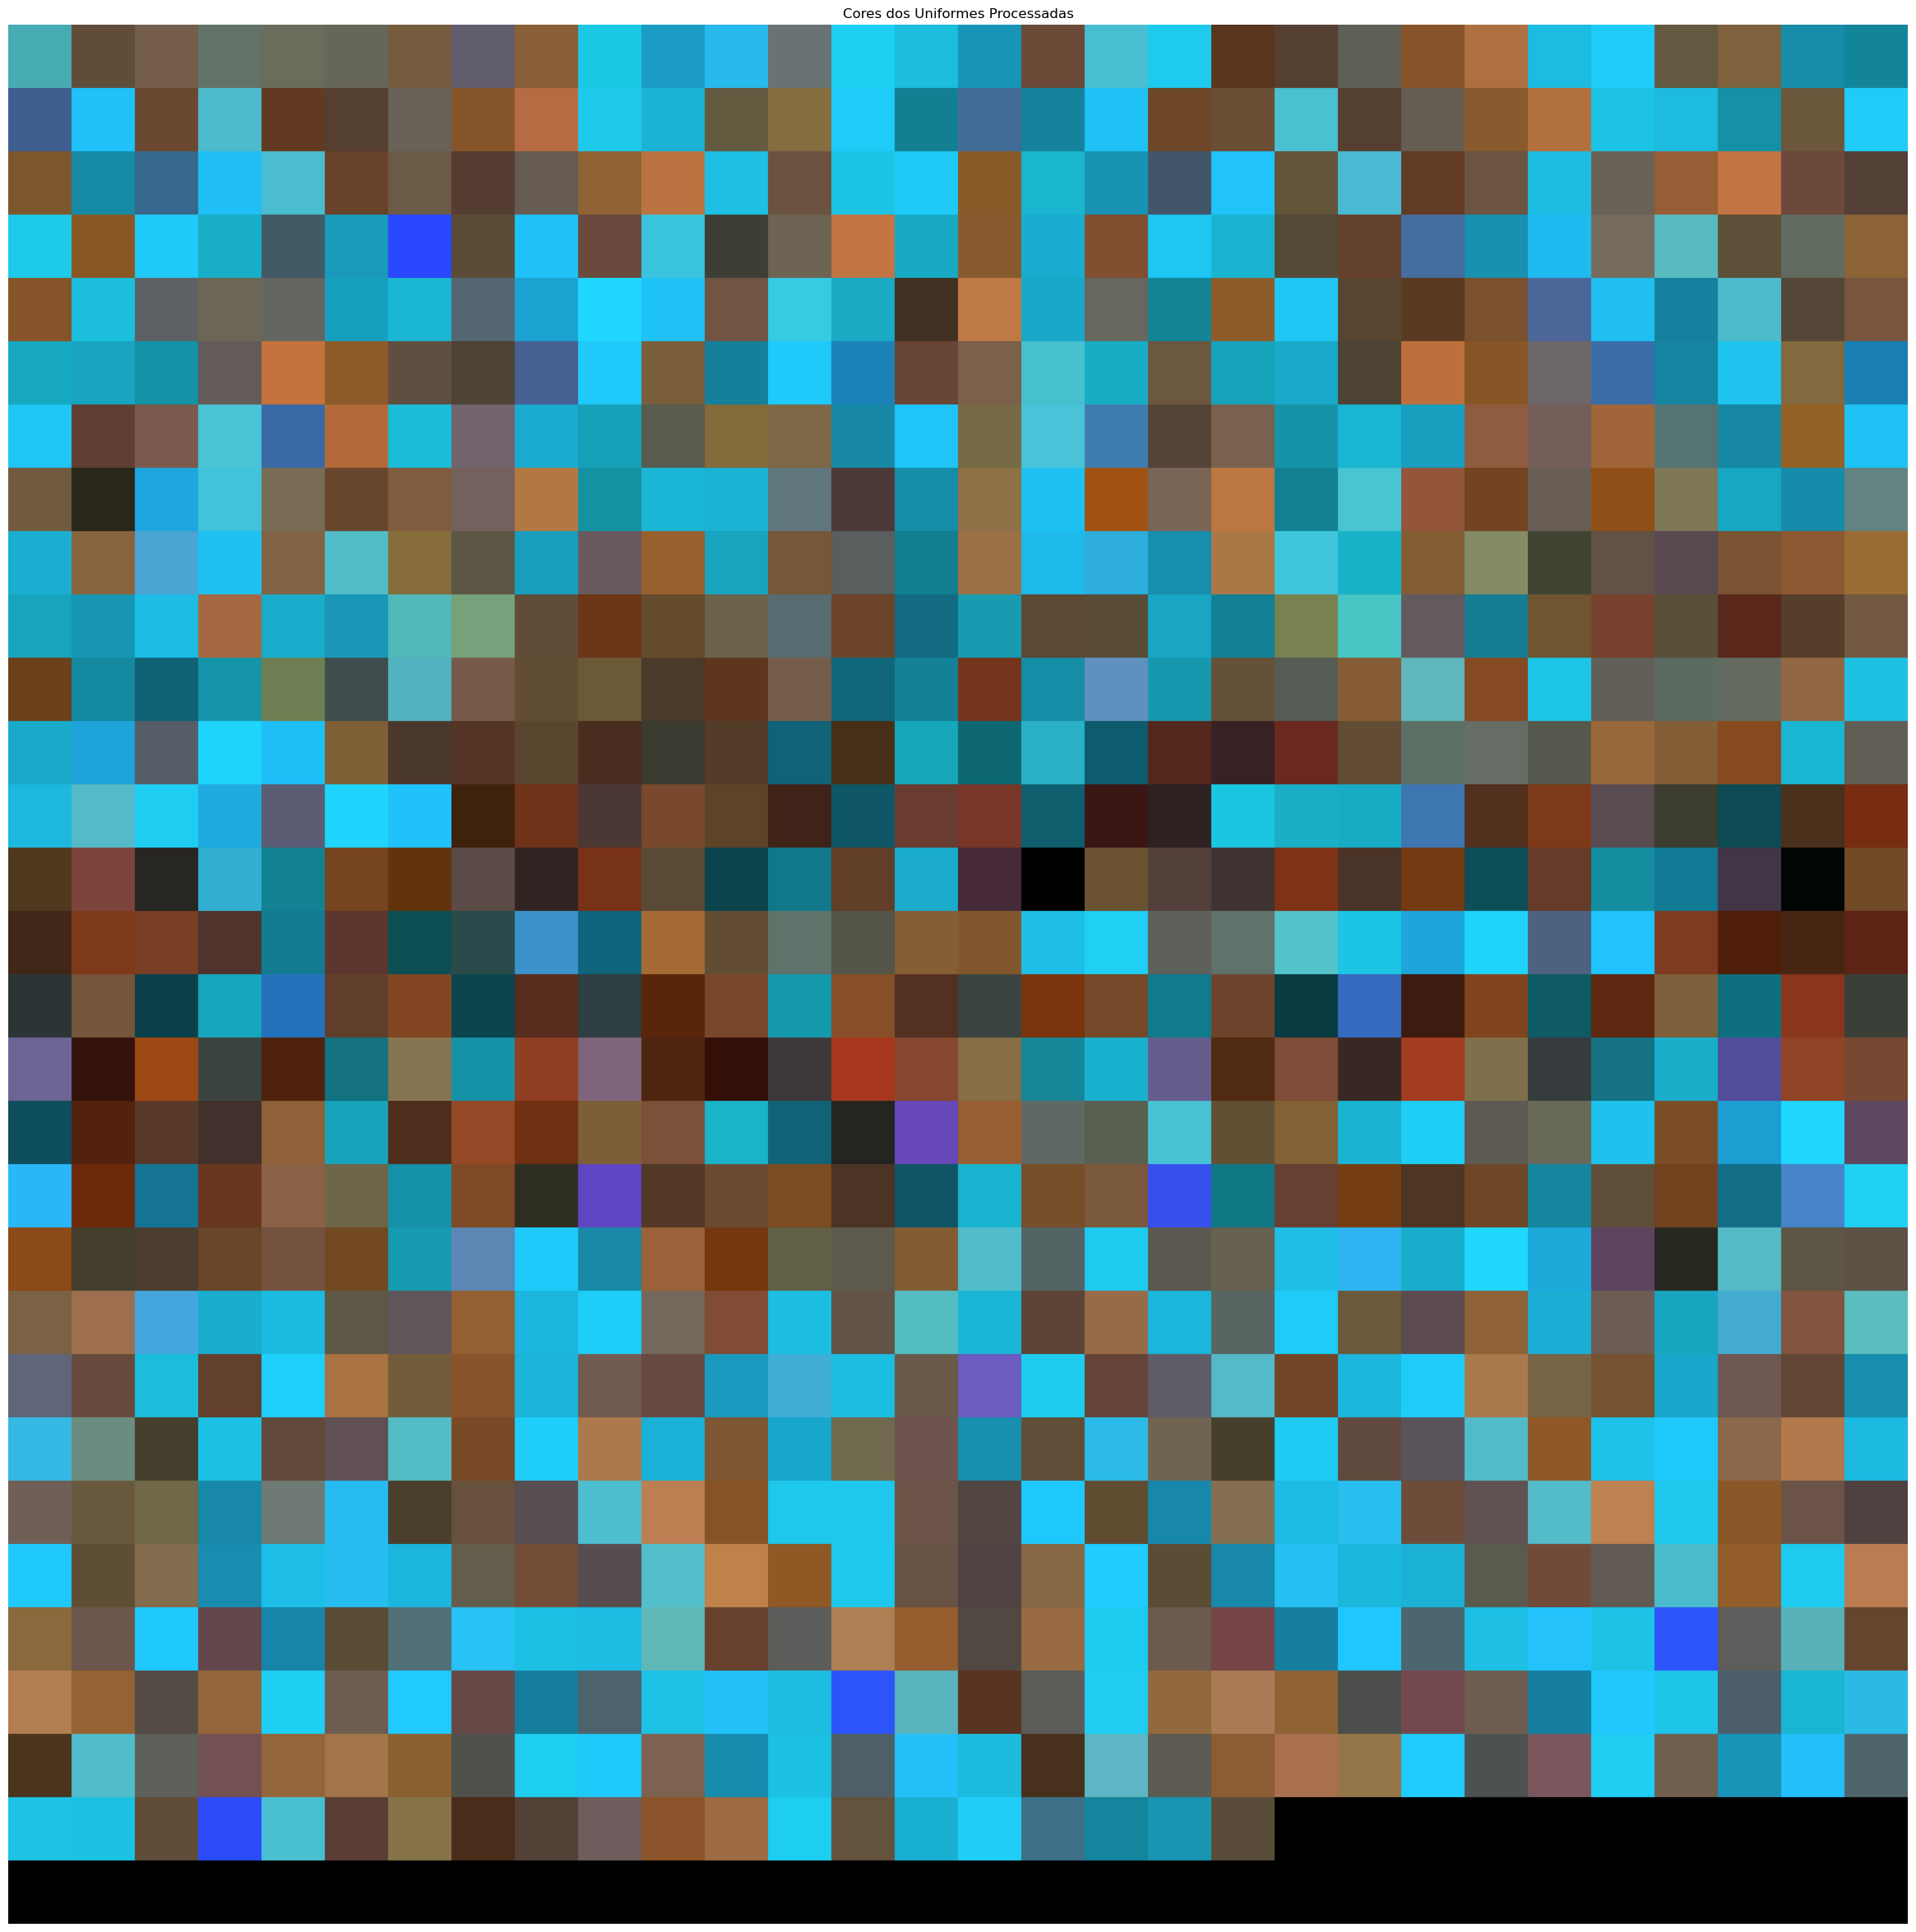

In [15]:
import json
import numpy as np
import matplotlib.pyplot as plt

def exibir_kits_colors(kits_colors):
    """
    Exibe uma imagem com as cores dos uniformes processadas a partir do array fornecido.
    Cada quadrado na imagem representa a cor média de um uniforme.

    Parâmetros:
    - kits_colors: array de cores médias dos uniformes (RGB).
    """
    # Número total de cores a serem exibidas
    num_colors = len(kits_colors)
    
    # Calcula o tamanho do grid para exibir todas as cores (aproximadamente quadrado)
    grid_rows = int(np.ceil(np.sqrt(num_colors)))  # Número de linhas
    grid_cols = grid_rows  # Número de colunas será igual ao de linhas para formar um grid quadrado

    # Cria uma imagem com espaço para todos os quadrados de cores
    color_image = np.zeros((grid_rows * 50, grid_cols * 50, 3), dtype=np.uint8)

    # Preenche a imagem com as cores do array
    for i, color in enumerate(kits_colors):
        row = i // grid_cols
        col = i % grid_cols
        color_image[row*50:(row+1)*50, col*50:(col+1)*50] = color  # Preenche quadrados 50x50 pixels

    # Ajusta o tamanho da imagem para que as cores fiquem em destaque
    plt.figure(figsize=(grid_cols, grid_rows))
    plt.imshow(color_image)
    plt.axis("off")
    plt.title("Cores dos Uniformes Processadas")
    plt.show()

def ler_cores_do_json(caminho_json):
    """
    Lê as cores médias dos uniformes a partir de um arquivo JSON.
    
    Parâmetros:
    - caminho_json: caminho do arquivo JSON.
    
    Retorna:
    - Um array de cores médias (RGB).
    """
    with open(caminho_json, 'r') as f:
        dados = json.load(f)
    
    # Criar uma lista para armazenar todas as cores
    todas_cores = []
    
    # Itera por todas as imagens e cores no arquivo JSON
    for imagem, cores in dados.items():
        # Cada cor precisa ser convertida de float para int e adicionada à lista
        for cor in cores:
            todas_cores.append([int(cor[0]), int(cor[1]), int(cor[2])])
    
    return todas_cores

# Caminho do arquivo JSON
caminho_json = r"D:\Projeto\hackfot\pqpdeubom\cores_jogadores\cores-jogadores.json"

# Lê as cores do arquivo JSON
kits_colors = ler_cores_do_json(caminho_json)

# Exibe as cores processadas
exibir_kits_colors(kits_colors)


In [27]:
import os
import numpy as np
import json
from sklearn.cluster import KMeans
import plotly.graph_objects as go

# Definir o número de threads para evitar vazamento de memória no Windows
os.environ["OMP_NUM_THREADS"] = "4"

# Caminho para o arquivo JSON
json_path = "D:/Projeto/hackfot/pqpdeubom/cores_jogadores/cores-jogadores.json"
with open(json_path, 'r') as f:
    data = json.load(f)

# Extrair cores
kits_colors = []
for image_colors in data.values():
    kits_colors.extend(image_colors)
kits_colors = np.array(kits_colors)

# Aplicar KMeans com 5 clusters e suprimir o aviso de n_init
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
kmeans.fit(kits_colors)

# Obter rótulos e centros dos clusters
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Criar o gráfico 3D interativo com plotly
fig = go.Figure()

# Adicionar os pontos de cores dos jogadores
fig.add_trace(go.Scatter3d(
    x=kits_colors[:, 0],
    y=kits_colors[:, 1],
    z=kits_colors[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=kits_colors / 255,  # Convertendo para escala de 0 a 1
        opacity=0.8
    ),
    name="Cores dos Jogadores"
))

# Adicionar os centros dos clusters
fig.add_trace(go.Scatter3d(
    x=centers[:, 0],
    y=centers[:, 1],
    z=centers[:, 2],
    mode='markers',
    marker=dict(
        size=10,
        color=centers / 255,
        symbol='x',
        line=dict(width=2, color='black')
    ),
    name="Centros dos Clusters"
))

# Configurações do gráfico
fig.update_layout(
    scene=dict(
        xaxis_title="R (Red)",
        yaxis_title="G (Green)",
        zaxis_title="B (Blue)"
    ),
    title="Distribuição das Cores dos Jogadores e Centros de Clusters"
)

# Exibir o gráfico
fig.show()


C:\Users\marcu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [28]:
pasta_imagens = 'D:/Projeto/hackfot/toy/val/images'
pasta_json = 'D:/Projeto/hackfot/toy/val/labels'
pasta_output = 'D:/Projeto/hackfot/pqpdeubom/jogadores-classificados'

FileNotFoundError: [Errno 2] No such file or directory: 'kits_colors.npy'

In [2]:
import cv2
import numpy as np
import os
import json
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Carregar cores dos uniformes do JSON
json_path = "D:/Projeto/hackfot/pqpdeubom/cores_jogadores/cores-jogadores.json"
with open(json_path, 'r') as f:
    data = json.load(f)

# Extrair cores
kits_colors = []
for image_colors in data.values():
    kits_colors.extend(image_colors)  
kits_colors = np.array(kits_colors)

# Treinar o modelo KMeans para agrupar cores similares
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10).fit(kits_colors)
centers = kmeans.cluster_centers_

# Caminho para pastas
pasta_imagens = 'D:/Projeto/hackfot/toy/val/images'
pasta_json = 'D:/Projeto/hackfot/toy/val/labels'
pasta_output = 'D:/Projeto/hackfot/pqpdeubom/jogadores-classificados'

# Definir a cor aproximada do uniforme do juiz
cor_juiz = (0, 0, 0)  # Ajuste a cor para a média aproximada do uniforme do juiz
intensidade_limite = 100  # Limite de intensidade para considerar uma cor "escura" (ajuste conforme necessário)

# Função para extrair a cor média
def calcular_cor_media(img, x1, y1, x2, y2):
    roi = img[y1:y2, x1:x2]
    media_cor = np.mean(roi, axis=(0, 1))  
    return media_cor

# Processar e classificar imagem
def processar_e_classificar_imagem(img_path, json_path, kmeans, centers, cor_juiz):
    img = cv2.imread(img_path)
    with open(json_path, 'r') as f:
        dados_json = json.load(f)

    for pessoa in dados_json.get("2dPlayerTracking", {}).get("people", []):
        x1, y1, x2, y2 = int(pessoa['left']), int(pessoa['top']), int(pessoa['right']), int(pessoa['bottom'])
        
        media_cor = calcular_cor_media(img, x1, y1, x2, y2)
        
        # Verificar se a cor média está próxima da cor do juiz
        if np.allclose(media_cor, cor_juiz, atol=30):  # Tolerância de 30 para ignorar variações
            continue  # Ignora o juiz e passa para a próxima detecção

        # Priorizar "Time 0" para cores escuras
        intensidade_media = np.mean(media_cor)
        if intensidade_media < intensidade_limite:
            cluster_label = 0  # Define como "Time 0" para cores escuras
        else:
            # Usar KMeans para classificar jogadores com base na cor média
            media_cor_reshape = media_cor.reshape(1, -1)
            cluster_label = kmeans.predict(media_cor_reshape)[0]

        # Desenhar caixa e rótulo
        cor_box = tuple(map(int, centers[cluster_label])) if cluster_label != 0 else (0, 128, 255)  # Cor laranja para Time 0
        cv2.rectangle(img, (x1, y1), (x2, y2), cor_box, 2)
        cv2.putText(img, f'Time {cluster_label}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, cor_box, 2)

    return img

# Selecionar imagens para teste
imagens = [img for img in os.listdir(pasta_imagens) if img.endswith((".jpg", ".png"))]
for nome_imagem in imagens:
    caminho_imagem = os.path.join(pasta_imagens, nome_imagem)
    caminho_json = os.path.join(pasta_json, os.path.splitext(nome_imagem)[0] + '.json')

    if os.path.exists(caminho_json):
        img_processada = processar_e_classificar_imagem(caminho_imagem, caminho_json, kmeans, centers, cor_juiz)
        caminho_saida = os.path.join(pasta_output, nome_imagem)
        cv2.imwrite(caminho_saida, img_processada)


In [ ]:
#gerar arquivos novos

In [46]:
import cv2
import numpy as np
import os
import json
from sklearn.cluster import KMeans

# Caminho para pastas de entrada e saída
pasta_imagens = 'D:/Projeto/hackfot/pqpdeubom/jogadores-classificados'
pasta_json = 'D:/Projeto/hackfot/toy/val/labels'
pasta_output = 'D:/Projeto/hackfot/pqpdeubom/classificacoes_finais'

# Treinar o modelo KMeans com as cores dos uniformes para classificação
json_path = "D:/Projeto/hackfot/pqpdeubom/cores_jogadores/cores-jogadores.json"
with open(json_path, 'r') as f:
    data = json.load(f)

# Extrair as cores do JSON
kits_colors = []
for image_colors in data.values():
    kits_colors.extend(image_colors)  
kits_colors = np.array(kits_colors)

# Treinar o KMeans para agrupar as cores
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10).fit(kits_colors)
centers = kmeans.cluster_centers_

# Função para calcular a cor média
def calcular_cor_media(img, x1, y1, x2, y2):
    roi = img[y1:y2, x1:x2]
    media_cor = np.mean(roi, axis=(0, 1))  
    return media_cor

# Função para processar uma imagem e gerar um novo arquivo JSON com as classificações de time
def processar_e_gerar_label(img_path, json_path, output_json_path, kmeans, centers):
    img = cv2.imread(img_path)
    with open(json_path, 'r') as f:
        dados_json = json.load(f)

    # Estrutura para armazenar as classificações
    classificacoes = {
        "2dPlayerTracking": {
            "people": []
        }
    }

    # Processar cada pessoa detectada no arquivo JSON
    for pessoa in dados_json.get("2dPlayerTracking", {}).get("people", []):
        x1, y1, x2, y2 = int(pessoa['left']), int(pessoa['top']), int(pessoa['right']), int(pessoa['bottom'])
        
        # Calcular a cor média na área do uniforme
        media_cor = calcular_cor_media(img, x1, y1, x2, y2)
        media_cor_reshape = media_cor.reshape(1, -1)
        
        # Classificar com o KMeans e ajustar rótulos para "Time 0" no caso de "Time 2"
        cluster_label = kmeans.predict(media_cor_reshape)[0]
        if cluster_label == 2:
            cluster_label = 0

        # Adicionar ao novo JSON a coordenada e o time classificado
        classificacoes["2dPlayerTracking"]["people"].append({
            "left": x1,
            "top": y1,
            "right": x2,
            "bottom": y2,
            "team": f"Time {cluster_label}"
        })

    # Salvar o novo JSON no diretório de saída
    with open(output_json_path, 'w') as outfile:
        json.dump(classificacoes, outfile, indent=4)

# Criar a pasta de saída, se não existir
os.makedirs(pasta_output, exist_ok=True)

# Processar todas as imagens e arquivos JSON
imagens = [img for img in os.listdir(pasta_imagens) if img.endswith((".jpg", ".png"))]
for nome_imagem in imagens:
    caminho_imagem = os.path.join(pasta_imagens, nome_imagem)
    nome_json = os.path.splitext(nome_imagem)[0] + '.json'
    caminho_json = os.path.join(pasta_json, nome_json)
    caminho_saida_json = os.path.join(pasta_output, nome_json)

    # Verificar se o JSON correspondente existe
    if os.path.exists(caminho_json):
        processar_e_gerar_label(caminho_imagem, caminho_json, caminho_saida_json, kmeans, centers)


C:\Users\marcu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



In [4]:
import json
import os

# Dimensões da imagem (ajuste de acordo com sua imagem)
imagem_largura = 1280  # Largura da imagem
imagem_altura = 720    # Altura da imagem

# Caminho para a pasta de entrada e saída
pasta_json_entrada = 'D:/Projeto/hackfot/pqpdeubom/classificacoes_finais'
pasta_saida = 'D:/Projeto/hackfot/pqpdeubom/classificacoes_convertidas'
os.makedirs(pasta_saida, exist_ok=True)

# Função para converter os dados do JSON para o formato desejado
def converter_para_formato_desejado(json_path, output_path, largura_img, altura_img):
    with open(json_path, 'r') as f:
        dados = json.load(f)
    
    linhas_saida = []
    for pessoa in dados.get("2dPlayerTracking", {}).get("people", []):
        # Obter coordenadas e time
        left = pessoa['left']
        top = pessoa['top']
        right = pessoa['right']
        bottom = pessoa['bottom']
        time = pessoa['team']
        
        # Converter o time para a classe (0 ou 1)
        classe = 0 if time == "Time 0" else 1

        # Calcular coordenadas normalizadas
        center_x = (left + right) / 2 / largura_img
        center_y = (top + bottom) / 2 / altura_img
        width = (right - left) / largura_img
        height = (bottom - top) / altura_img

        # Adicionar a linha no formato desejado
        linha = f"{classe} {center_x} {center_y} {width} {height}"
        linhas_saida.append(linha)
    
    # Salvar no arquivo de saída
    with open(output_path, 'w') as f:
        f.write("\n".join(linhas_saida))

# Processar todos os arquivos JSON na pasta de entrada
for nome_arquivo in os.listdir(pasta_json_entrada):
    if nome_arquivo.endswith(".json"):
        caminho_json = os.path.join(pasta_json_entrada, nome_arquivo)
        caminho_saida = os.path.join(pasta_saida, os.path.splitext(nome_arquivo)[0] + '.txt')
        
        # Converter e salvar no formato desejado
        converter_para_formato_desejado(caminho_json, caminho_saida, imagem_largura, imagem_altura)


In [ ]:
#treinando modelo

In [ ]:
from ultralytics import YOLO
import torch
import os

print('Configurando CPU...')
DEVICE = torch.device('cpu')
print(f'\nDevice: {DEVICE}')

model = YOLO("yolo11n.pt")  

results = model.train(data="D:/Projeto/hackfot/FINAL/config.yaml", epochs=1000, imgsz=640)

In [ ]:
#inferrencia

In [53]:
from ultralytics import YOLO
import os

modelo_treinado = 'D:/Projeto/hackfot/FINAL/runs/detect/train2/weights/best.pt'

model = YOLO(modelo_treinado)

# diretório com as imagens de teste para realizar a inferência 
diretorio_teste = 'D:/Projeto/hackfot/toycomprimido/train/images'

# cria o diretório de saída se ele ainda não tiver sido criado
diretorio_saida = 'D:/Projeto/hackfot/FINAL/outoutputput2'

os.makedirs(diretorio_saida, exist_ok=True)

# inferência nas imagens de teste
resultados = model(diretorio_teste)

# salva as detecções nas imagens de teste
for i, result in enumerate(resultados):
    img_path = os.path.join(diretorio_saida, f"deteccao_{i}.jpg")
    result.save(img_path)

print("Resultados do teste:", diretorio_saida)



image 1/40 D:\Projeto\hackfot\toycomprimido\train\images\imagem102.png: 384x640 10 Time As, 8 Time Bs, 38.0ms
image 2/40 D:\Projeto\hackfot\toycomprimido\train\images\imagem103.png: 384x640 10 Time As, 8 Time Bs, 52.0ms
image 3/40 D:\Projeto\hackfot\toycomprimido\train\images\imagem105.png: 384x640 9 Time As, 8 Time Bs, 15.0ms
image 4/40 D:\Projeto\hackfot\toycomprimido\train\images\imagem107.png: 384x640 9 Time As, 8 Time Bs, 17.0ms
image 5/40 D:\Projeto\hackfot\toycomprimido\train\images\imagem109.png: 384x640 9 Time As, 8 Time Bs, 18.0ms
image 6/40 D:\Projeto\hackfot\toycomprimido\train\images\imagem118.png: 384x640 11 Time As, 9 Time Bs, 12.0ms
image 7/40 D:\Projeto\hackfot\toycomprimido\train\images\imagem123.png: 384x640 11 Time As, 8 Time Bs, 18.0ms
image 8/40 D:\Projeto\hackfot\toycomprimido\train\images\imagem128.png: 384x640 10 Time As, 9 Time Bs, 15.0ms
image 9/40 D:\Projeto\hackfot\toycomprimido\train\images\imagem131.png: 384x640 10 Time As, 9 Time Bs, 18.0ms
image 10/40 

In [ ]:
from ultralytics import YOLO
import os

# Caminho do modelo treinado
modelo_treinado = 'D:/Projeto/hackfot/FINAL/runs/detect/train2/weights/best.pt'
model = YOLO(modelo_treinado)

# Caminho do vídeo de entrada para realizar a inferência
video_entrada = 'D:/hackathon/futebol/2019_03_24-BAG-RS_CRU-RS/video.mp4'

# Diretório de saída para salvar os resultados do vídeo
diretorio_saida = 'D:/Projeto/hackfot/FINAL/outoutputput'
os.makedirs(diretorio_saida, exist_ok=True)

# Realizar inferência no vídeo e salvar o vídeo processado no diretório de saída
resultado = model(video_entrada, save=True, project=diretorio_saida, name="detec_video")

print("Resultados do teste salvos em:", diretorio_saida)


In [ ]:
#TESTE INFERENCIA UMA IMAGEM

In [1]:
from ultralytics import YOLO
import os

# Caminho do modelo treinado
modelo_treinado = 'D:/Projeto/hackfot/FINAL/runs/detect/train2/weights/best.pt'
model = YOLO(modelo_treinado)

# Caminho da imagem de teste para realizar a inferência
imagem_teste = 'D:/hackathon/futebol/2024_09_01_Amazonas_Ceara/frames_certo/frame_14019.png'  # Substitua pelo nome da imagem específica

# Diretório de saída para salvar o resultado
diretorio_saida = 'D:/Projeto/hackfot/FINAL/outoutputput3'
os.makedirs(diretorio_saida, exist_ok=True)

# Realizar inferência na imagem de teste
resultados = model(imagem_teste)

# Salva a detecção na imagem de teste
img_path = os.path.join(diretorio_saida, "deteccao.png")
resultados[0].save(img_path)

print("Resultado do teste salvo em:", img_path)


C:\Users\marcu\anaconda3\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


image 1/1 D:\hackathon\futebol\2024_09_01_Amazonas_Ceara\frames_certo\frame_14019.png: 384x640 9 Time As, 6 Time Bs, 60.1ms
Speed: 7.0ms preprocess, 60.1ms inference, 194.2ms postprocess per image at shape (1, 3, 384, 640)
Resultado do teste salvo em: D:/Projeto/hackfot/FINAL/outoutputput3\deteccao.png


In [ ]:
#teste lacross

In [7]:
from ultralytics import YOLO
import cv2
import os

# Caminho do modelo treinado
modelo_treinado = 'D:/Projeto/hackfot/FINAL/runs/detect/train2/weights/best.pt'
model = YOLO(modelo_treinado)

# Caminho do vídeo para realizar a inferência
video_teste = 'D:/hackathon/futebol/2024_09_01_Amazonas_Ceara/video.mp4'  # Substitua pelo caminho do vídeo

# Diretório de saída para salvar o vídeo processado
diretorio_saida = 'D:/Projeto/hackfot/FINAL/outoutputput3'
os.makedirs(diretorio_saida, exist_ok=True)
video_saida_path = os.path.join(diretorio_saida, "video_deteccao.mp4")

# Inicializar captura de vídeo
cap = cv2.VideoCapture(video_teste)

# Obter informações do vídeo para salvar a saída com o mesmo tamanho e FPS
fps = int(cap.get(cv2.CAP_PROP_FPS))
largura = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
altura = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Inicializar o objeto de gravação de vídeo
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(video_saida_path, fourcc, fps, (largura, altura))

print("Processando vídeo...")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Realizar inferência no frame
    resultados = model(frame)

    # Obter imagem com as detecções e converter para o formato BGR para exibir com OpenCV
    img_com_deteccoes = resultados[0].plot()  # plot() retorna a imagem com detecções sobrepostas

    # Exibir o frame processado em tempo real
    cv2.imshow("Detecções em Tempo Real", img_com_deteccoes)

    # Gravar o frame processado no vídeo de saída
    out.write(img_com_deteccoes)

    # Parar o processo ao pressionar a tecla 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar recursos
cap.release()
out.release()
cv2.destroyAllWindows()

print("Processamento concluído. Vídeo salvo em:", video_saida_path)


Processando vídeo...

0: 384x640 2 Time Bs, 76.8ms
Speed: 3.0ms preprocess, 76.8ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Time Bs, 45.0ms
Speed: 3.0ms preprocess, 45.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Time Bs, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Time Bs, 12.0ms
Speed: 1.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Time B, 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Time B, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 Time Bs, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Time Bs, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 1.0ms postprocess p

KeyboardInterrupt: 